In [1]:
import pandas as pd
import networkx as nx
from itertools import combinations

In [2]:
df = pd.read_csv("/home/ada/Documents/DTA/Thesis/Ready_for_git/Data/Spartacus_test/Spartacus1-02.csv")

In [6]:
df

,Unnamed: 0,Start,Stop,Speaker
0,0,4.729688,7.176562,Sura
1,1,8.070937,8.897813,SPEAKER_06
2,2,8.897813,10.416562,SPEAKER_07
3,3,10.416562,12.509063,Spartacus
4,4,12.745313,15.242813,Claudius
...,...,...,...,...
515,515,3046.499063,3049.300313,Spartacus
516,516,3052.118438,3053.299687,Spartacus
517,517,3054.700313,3056.910937,Spartacus
518,518,3070.073438,3071.153438,Batiatus


In [3]:
def name_all(df):
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_19", "Batiatus")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_20", "Batiatus")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_09", "Spartacus")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_12", "Sura")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_17", "Lucretia")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_08", "Crixus")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_11", "Oenomaus")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_15", "Screaming_and_grunts")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_04", "Varro")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_02", "Claudius")
  return df

df2 = name_all(df)
speaker_list = df2['Speaker'].tolist()

In [4]:
G = nx.Graph()

si, ei = 0, 2 #start index, end index
while ei < len(speaker_list):
    interaction = []
    for character in set(speaker_list[si : ei]):
        if ' ' in character:
            interaction.extend(character.split())
        else:
            interaction.append(character)
    interaction = set(interaction)
    if len(interaction) > 1:
        for sp1, sp2 in combinations(interaction, 2):
            if G.has_edge(sp1, sp2):
                G[sp1][sp2]['weight'] += 1
            else:
                G.add_edge(sp1, sp2, weight=1)
    si += 1
    ei += 1

In [5]:
print(G.nodes)
print(f"# nodes = {G.number_of_nodes()}, # edges = {G.number_of_edges()}")
nx.write_gexf(G, '/home/ada/Documents/DTA/Thesis/Ready_for_git/Data/Spartacus_test/spartacus_S01E02.gexf')
print('# interactions:', G.size(weight='weight'))

['SPEAKER_06', 'Sura', 'SPEAKER_07', 'Spartacus', 'Claudius', 'Batiatus', 'SPEAKER_18', 'Screaming_and_grunts', 'Oenomaus', 'SPEAKER_00', 'Lucretia', 'Crixus', 'SPEAKER_10', 'SPEAKER_01', 'SPEAKER_14', 'Varro', 'SPEAKER_13', 'SPEAKER_03', 'SPEAKER_05', 'SPEAKER_16']
# nodes = 20, # edges = 68
# interactions: 198.0


In [25]:
from copy import deepcopy

print('Before:')
print(f"# nodes = {G.number_of_nodes()}, # edges = {G.number_of_edges()}")
print('# interactions:', G.size(weight='weight'))

G.remove_node('SPEAKER_06')
print('After:')
print(f"# nodes = {G.number_of_nodes()}, # edges = {G.number_of_edges()}")
print('# interactions:', G.size(weight='weight'))


Before:
# nodes = 20, # edges = 68
# interactions: 198.0
After:
# nodes = 19, # edges = 61
# interactions: 186.0


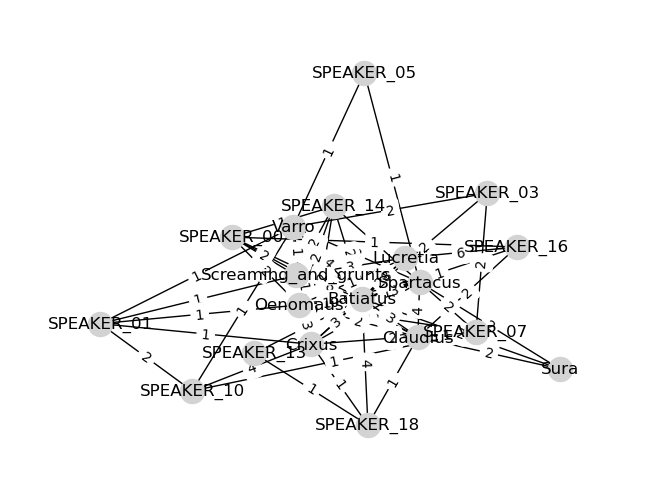

In [26]:
import matplotlib.pyplot as plt
from matplotlib.figure import _AxesStack

pos = nx.spring_layout(G, scale=2)
nx.draw(G, pos, node_color='lightgrey')
nx.draw_networkx_labels(G, pos);
nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'weight'));

# take care of margins
plot_margin = 0.25
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin, x1 + plot_margin,
          y0 - plot_margin, y1 + plot_margin))
plt.axis('off');

In [27]:
nx.to_pandas_edgelist(G)

,source,target,weight
0,Sura,Claudius,2
1,Sura,Spartacus,2
2,Sura,Batiatus,2
3,SPEAKER_07,Spartacus,2
4,SPEAKER_07,SPEAKER_10,1
...,...,...,...
56,SPEAKER_10,SPEAKER_01,2
57,SPEAKER_10,Varro,1
58,SPEAKER_01,Varro,1
59,Varro,SPEAKER_03,2


In [28]:
unweighted = G.degree()
weighted = G.degree(weight='weight')
bcent = nx.betweenness_centrality(G)
bcent

print(weighted)
print(unweighted)

[('Sura', 6), ('SPEAKER_07', 10), ('Spartacus', 32), ('Claudius', 20), ('Batiatus', 92), ('SPEAKER_18', 7), ('Screaming_and_grunts', 32), ('Oenomaus', 34), ('SPEAKER_00', 10), ('Lucretia', 39), ('Crixus', 22), ('SPEAKER_10', 8), ('SPEAKER_01', 6), ('SPEAKER_14', 10), ('Varro', 14), ('SPEAKER_13', 12), ('SPEAKER_03', 6), ('SPEAKER_05', 2), ('SPEAKER_16', 10)]
[('Sura', 3), ('SPEAKER_07', 6), ('Spartacus', 10), ('Claudius', 9), ('Batiatus', 14), ('SPEAKER_18', 4), ('Screaming_and_grunts', 10), ('Oenomaus', 10), ('SPEAKER_00', 6), ('Lucretia', 5), ('Crixus', 11), ('SPEAKER_10', 4), ('SPEAKER_01', 5), ('SPEAKER_14', 6), ('Varro', 8), ('SPEAKER_13', 2), ('SPEAKER_03', 3), ('SPEAKER_05', 2), ('SPEAKER_16', 4)]


In [29]:
pairs = dict(nx.all_pairs_shortest_path_length(G))
pairs

{'Sura': {'Sura': 0,
  'Spartacus': 1,
  'Claudius': 1,
  'Batiatus': 1,
  'Lucretia': 2,
  'SPEAKER_13': 2,
  'SPEAKER_00': 2,
  'Varro': 2,
  'Oenomaus': 2,
  'SPEAKER_16': 2,
  'SPEAKER_03': 2,
  'SPEAKER_05': 2,
  'SPEAKER_18': 2,
  'SPEAKER_14': 2,
  'SPEAKER_07': 2,
  'Screaming_and_grunts': 2,
  'Crixus': 2,
  'SPEAKER_10': 3,
  'SPEAKER_01': 3},
 'SPEAKER_07': {'SPEAKER_07': 0,
  'Oenomaus': 1,
  'SPEAKER_03': 1,
  'Spartacus': 1,
  'Claudius': 1,
  'SPEAKER_10': 1,
  'Crixus': 1,
  'Sura': 2,
  'Lucretia': 2,
  'SPEAKER_00': 2,
  'Varro': 2,
  'SPEAKER_16': 2,
  'SPEAKER_05': 2,
  'SPEAKER_18': 2,
  'SPEAKER_14': 2,
  'Batiatus': 2,
  'Screaming_and_grunts': 2,
  'SPEAKER_01': 2,
  'SPEAKER_13': 3},
 'Spartacus': {'Spartacus': 0,
  'Sura': 1,
  'Varro': 1,
  'Oenomaus': 1,
  'SPEAKER_05': 1,
  'SPEAKER_14': 1,
  'Batiatus': 1,
  'SPEAKER_07': 1,
  'Claudius': 1,
  'Screaming_and_grunts': 1,
  'Crixus': 1,
  'SPEAKER_03': 2,
  'SPEAKER_01': 2,
  'SPEAKER_13': 2,
  'SPEAKER_00':

In [30]:
import pandas as pd
data = []
for c in sorted(pairs.keys()):
    data.append([pairs[c][d] for d in sorted(pairs.keys())])
pd.DataFrame(data, index=sorted(pairs.keys()), columns=sorted(pairs.keys()))

,Batiatus,Claudius,Crixus,Lucretia,Oenomaus,SPEAKER_00,SPEAKER_01,SPEAKER_03,SPEAKER_05,SPEAKER_07,SPEAKER_10,SPEAKER_13,SPEAKER_14,SPEAKER_16,SPEAKER_18,Screaming_and_grunts,Spartacus,Sura,Varro
Batiatus,0,1,1,1,1,1,2,1,2,2,2,1,1,1,1,1,1,1,1
Claudius,1,0,2,2,1,1,2,2,2,1,2,2,2,1,1,1,1,1,2
Crixus,1,2,0,1,1,2,1,2,2,1,1,2,1,2,1,1,1,2,1
Lucretia,1,2,1,0,1,2,2,2,3,2,2,2,2,1,2,1,2,2,2
Oenomaus,1,1,1,1,0,1,1,2,2,1,2,2,1,2,2,1,1,2,2
SPEAKER_00,1,1,2,2,1,0,2,2,3,2,3,2,1,1,2,1,2,2,2
SPEAKER_01,2,2,1,2,1,2,0,2,2,2,1,3,2,3,2,1,2,3,1
SPEAKER_03,1,2,2,2,2,2,2,0,2,1,2,2,2,2,2,2,2,2,1
SPEAKER_05,2,2,2,3,2,3,2,2,0,2,2,3,2,3,3,2,1,2,1
SPEAKER_07,2,1,1,2,1,2,2,1,2,0,1,3,2,2,2,2,1,2,2


In [31]:
weighted = nx.betweenness_centrality(G)

data = [(c, weighted[c]) for c in G.nodes()]
pd.DataFrame(data, columns=('character', 'betweenness centrality'))

,character,betweenness centrality
0,Sura,0.000000
1,SPEAKER_07,0.031264
2,Spartacus,0.100949
3,Claudius,0.066517
4,Batiatus,0.263939
5,SPEAKER_18,0.012979
6,Screaming_and_grunts,0.047942
7,Oenomaus,0.050276
8,SPEAKER_00,0.009031
9,Lucretia,0.009952


In [32]:
nx.pagerank(G)

{'Sura': 0.020942522649175566,
 'SPEAKER_07': 0.03349438878785485,
 'Spartacus': 0.08438778953258548,
 'Claudius': 0.054279145716697744,
 'Batiatus': 0.21381532404541168,
 'SPEAKER_18': 0.02284347763912628,
 'Screaming_and_grunts': 0.07887446059782387,
 'Oenomaus': 0.08385912755392362,
 'SPEAKER_00': 0.029478945793179997,
 'Lucretia': 0.08861016107847926,
 'Crixus': 0.0632811778737637,
 'SPEAKER_10': 0.03000024354577917,
 'SPEAKER_01': 0.02367655938150045,
 'SPEAKER_14': 0.029866034457517166,
 'Varro': 0.045627800769837676,
 'SPEAKER_13': 0.03239915770211225,
 'SPEAKER_03': 0.023080344395752406,
 'SPEAKER_05': 0.012906515281555703,
 'SPEAKER_16': 0.028576823197923047}